### Import Necessary Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [19]:
df = pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\ms excel\\Python\\Dataset .csv")

### Explore the Data

1. Preview the dataset:

In [3]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Task 1: Restaurant Ratings

1. Analyze the distribution of aggregate ratings and determine the most common rating range.
2. Calculate the average number of votes received by restaurants.

### Step 1: Data Processing

1. Handle missing values:

In [4]:
df = df.dropna(subset = ['Aggregate rating', 'Votes'])

In [18]:
df['Votes'] = df['Votes'].fillna(0)

### Step 2: Analysis of the distribution of aggregate ratings and determination of the most common rating range

1. Visualization of the distribution of aggregate ratings:

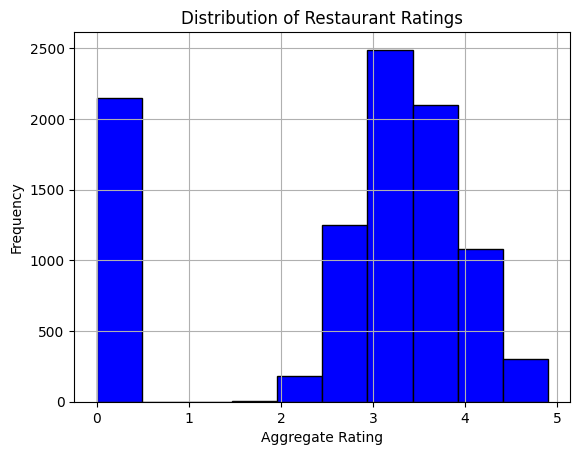

In [7]:
df['Aggregate rating'].hist(bins = 10, color = 'blue', edgecolor = 'black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

2. Most common rating range:

In [22]:
rating_bins = pd.cut(df['Aggregate rating'], bins = [0 , 2 , 3 , 4 , 5], labels = ['0-2', '2-3', '3-4', '4-5'])
rating_range_counts = rating_bins.value_counts()
print(rating_range_counts)
most_common_range = rating_range_counts.idxmax()
print(f"The most common rating range is {most_common_range}.")

Aggregate rating
3-4    4388
2-3    1891
4-5    1114
0-2      10
Name: count, dtype: int64
The most common rating range is 3-4.


3. Visualization of the rating ranges:

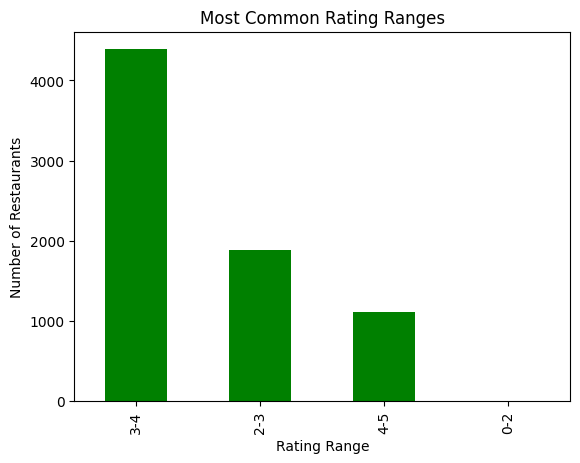

In [14]:
rating_range_counts.plot(kind = 'bar', color = 'green')
plt.title('Most Common Rating Ranges')
plt.xlabel('Rating Range')
plt.ylabel('Number of Restaurants')
plt.show()

### Step 3: Calculation of the average number of votes

1. Average number of votes:

In [23]:
avg_votes = df['Votes'].mean()
print(f"The average number of votes received by restaurants is {avg_votes:.2f}.")

The average number of votes received by restaurants is 156.91.


2. Visualization:

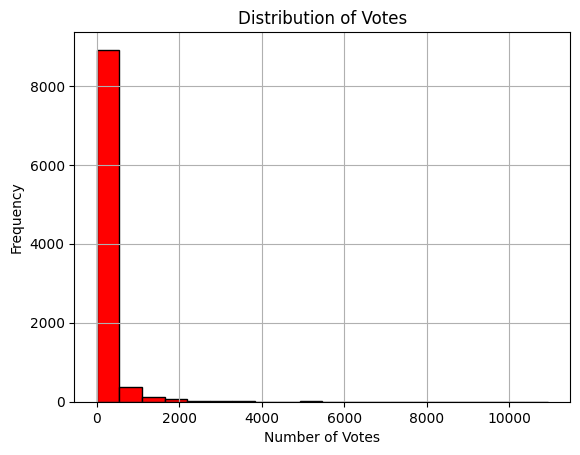

In [24]:
df['Votes'].hist(bins = 20, color = 'red', edgecolor = 'black')
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

### Step 4: The Insights

# Task 2: Cuisine Combination

1. Identify the most common combinations of cuisines in the dataset.
2. Determine if certain cuisine combinations tend to have higher ratings.

### Step 1: Data Processing

1. Handle missing values:

In [32]:
df = df.dropna(subset = ['Cuisines'])

2. Standardize the cuisines data:

In [36]:
df['Cuisines'] = df['Cuisines'].str.strip().str.lower()

3. Convert cuisines combinations into sorted tuples:

In [47]:
df['cuisine_combinations'] = df['Cuisines'].apply(lambda x: tuple(sorted(x.split(','))))

### Step 2: Most common cuisines combinations in the dataset

1. Number of Occurrences of each combination:

In [48]:
cuisine_counts = df['cuisine_combinations'].value_counts()
print(cuisine_counts.head(10))

cuisine_combinations
(north indian,)                       936
( chinese, north indian)              511
(fast food,)                          354
(chinese,)                            354
( mughlai, north indian)              334
(cafe,)                               299
( chinese,  mughlai, north indian)    267
(bakery,)                             218
( desserts, bakery)                   170
(street food,)                        149
Name: count, dtype: int64


2. Visualization of the top combinations:

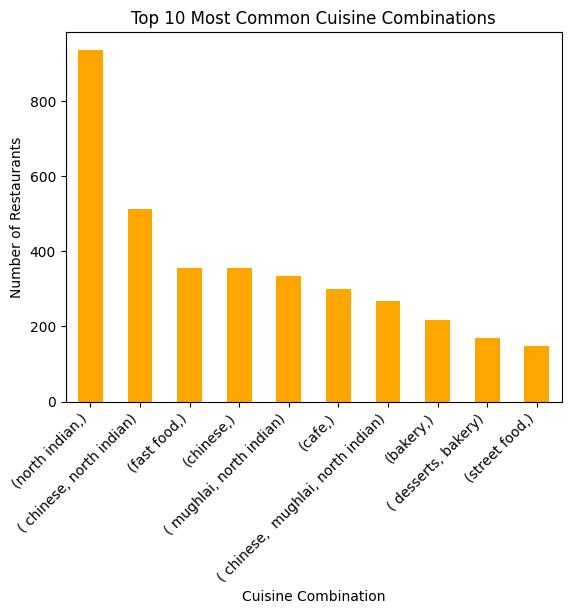

In [42]:
cuisine_counts.head(10).plot(kind = 'bar', color = 'orange')
plt.title('Top 10 Most Common Cuisine Combinations')
plt.xlabel('Cuisine Combination')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

### Step 3: Analysis of Ratings for cuisine combinations

1. Calculation of the mean rating of cuisines combination:

In [49]:
avg_ratings_by_combination = df.groupby('cuisine_combinations')['Aggregate rating'].mean()
print(avg_ratings_by_combination.sort_values(ascending = False).head(10))

cuisine_combinations
( breakfast,  southern, bbq)        4.9
( burger,  grill, american)         4.9
( caribbean,  seafood, american)    4.9
( indian, continental)              4.9
( asian,  indian, european)         4.9
( indonesian, sunda)                4.9
( coffee and tea, american)         4.9
( sandwich,  tea, american)         4.9
( deli, italian)                    4.9
( german, european)                 4.9
Name: Aggregate rating, dtype: float64


2. Combination of the frequency and avg ratings into single dataframe:

In [50]:
cuisine_analysis = pd.DataFrame({
    'count': cuisine_counts, 'average_rating': avg_ratings_by_combination
}).reset_index().rename(columns = {'index': 'cuisine_combinations'})

print(cuisine_analysis.head())

                          cuisine_combinations  count  average_rating
0     ( afghani,  chinese,  indian, pakistani)      1             4.1
1       ( afghani,  curry,  indian, pakistani)      1             3.9
2         ( afghani,  fast food, north indian)      1             3.0
3  ( afghani,  hyderabadi,  indian, pakistani)      1             4.0
4           ( afghani,  mughlai, north indian)      1             4.3


3. Filter for cuisine combinations with significant counts:

In [52]:
significant_cuisines = cuisine_analysis[cuisine_analysis['count']>5]

4. Visualization of the top_rated combinations: 

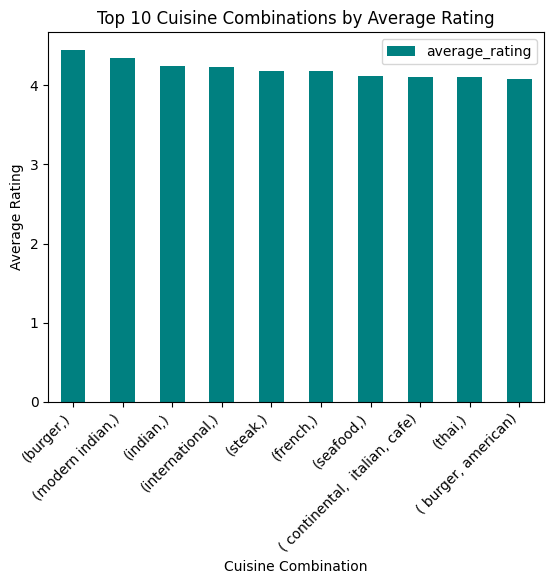

In [53]:
significant_cuisines.sort_values('average_rating', ascending = False).head(10).plot(
    kind = 'bar', x = 'cuisine_combinations', y = 'average_rating', color = 'teal'
)
plt.title('Top 10 Cuisine Combinations by Average Rating')
plt.xlabel('Cuisine Combination')
plt.ylabel('Average Rating')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

### Step 4: The Insights

# Task 3: Geographic Analysis 

1. Plot the locations of restaurants on a map using longitude and latitude coordinates.
2. Identify any patterns or clusters of restaurants in specific areas.

### Step 1: Data Processing

1. Handle missing values:

In [4]:
df = df.dropna(subset = ['Latitude', 'Longitude'])

### Step 2: Plot the locations of restaurants on a map using longitude and latitude coordinates

1. Initialization of a map centered on the average coordinates:

In [5]:
# Import necessary libraries
import folium

# Calculate the center of the map
avg_lat = df['Latitude'].mean()
avg_lon = df['Longitude'].mean()

# Folium map
restaurant_map = folium.Map(location = [avg_lat, avg_lon], zoom_start = 12)


2. Addition of restaurant locations as markers:

In [6]:
for _, row in df.iterrows():
    folium.Marker(
        location = [row['Latitude'], row['Longitude']],
        popup = f"Restaurant: {row['Restaurant Name']} \nRating: {row['Aggregate rating']}",
        icon = folium.Icon(color = "blue", icon = "info-sign")
    ).add_to(restaurant_map)

3. Display the map:

In [7]:
import webbrowser

# Save the map
restaurant_map.save("restaurant_map.html")

# Open the map in the default web browser
webbrowser.open("restaurant_map.html")


True

### Step 3: Identify Patterns or Clusters

1. A heatmap to visualize density:

In [8]:
from folium.plugins import HeatMap

heat_data = df[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data).add_to(restaurant_map)
restaurant_map.save("heatmap.html")


2. Cluster markers to reduce clutter:

In [9]:
from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(restaurant_map)

for _, row in df.iterrows():
    folium.Marker(
        location = [row['Longitude'], row['Latitude']],
        popup = f"Restaurant: {row['Restaurant Name']}\nRating: {row['Aggregate rating']}",
    ).add_to(marker_cluster)

restaurant_map.save("cluster_map.html")

### Step 4: Analyze Patterns or Clusters

1. Number of restaurants in specific geographic area:

In [27]:
area_clusters = df.groupby(['City']).size().sort_values(ascending = False)
print(area_clusters)


City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Trentham East          1
Weirton                1
Vineland Station       1
Winchester Bay         1
Yorkton                1
Length: 141, dtype: int64


2. Average ratings in dense clusters:

In [37]:
cluster_avg_ratings = df.groupby(['City'])['Aggregate rating'].mean()
print(cluster_avg_ratings)


City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
stanbul            4.292857
Name: Aggregate rating, Length: 141, dtype: float64


### Step 5: The Insights

# Task 4: Restaurant Chains

1. Identify if there are any restaurant chains present in the dataset.
2. Analyze the ratings and popularity of different restaurant chains.

### Step 1: Data Processing

1. Handle missing values

In [4]:
df = df.dropna(subset = ['Restaurant Name', 'Aggregate rating', 'Votes'])


2. Standardize the data

In [5]:
df['Restaurant Name'] = df['Restaurant Name'].str.strip().str.lower()

### Step 2: Identify Restaurant Chains

1. Number of the occurrences of each restaurant name:

In [6]:
chain_counts = df['Restaurant Name'].value_counts()
print(chain_counts.head(10))


Restaurant Name
cafe coffee day     83
domino's pizza      79
subway              63
green chick chop    51
mcdonald's          48
keventers           34
pizza hut           30
giani               29
baskin robbins      28
barbeque nation     26
Name: count, dtype: int64


2. Filter for chains with more than one location:

In [7]:
restaurant_chains = chain_counts[chain_counts>1]
print(restaurant_chains)

Restaurant Name
cafe coffee day     83
domino's pizza      79
subway              63
green chick chop    51
mcdonald's          48
                    ..
dunkin donuts        2
taste of china       2
suruchi              2
coco bambu           2
brown town           2
Name: count, Length: 742, dtype: int64


3. A new column to flag chain restaurants:

In [8]:
df['is_chain'] = df['Restaurant Name'].isin(restaurant_chains.index)

### Step 3: Analysis of the ratings of restaurant chains

1. Calculation of average ratings and votes:

In [9]:

chain_analysis = df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'is_chain': 'first'
}).reset_index()


# Filter for chains only
chain_analysis = chain_analysis[chain_analysis['is_chain']]
print(chain_analysis.head())

         Restaurant Name  Aggregate rating  Votes  is_chain
7      10 downing street          4.000000    670      True
27    221 b baker street          3.366667    215      True
44    34 parkstreet lane          3.050000     31      True
45  34, chowringhee lane          2.791667    777      True
59        4700bc popcorn          3.500000    176      True


2. Sort by votes:

In [10]:

top_chains_by_votes = chain_analysis.sort_values('Votes', ascending = False).head(10)
print(top_chains_by_votes)


                Restaurant Name  Aggregate rating  Votes  is_chain
653             barbeque nation          4.353846  28142      True
124   ab's - absolute barbecues          4.825000  13400      True
779                   big chill          4.475000  10853      True
2291                 farzi cafe          4.366667  10098      True
6985                   truffles          3.950000   9682      True
1508                    chili's          4.580000   8156      True
3263               joey's pizza          4.250000   7807      True
790             big yellow door          4.266667   7511      True
5559            saravana bhavan          4.133333   7238      True
6079                  starbucks          3.805556   7139      True


3. Sort by ratings:

In [11]:

top_chains_by_rating = chain_analysis.sort_values('Aggregate rating', ascending = False).head(10)
print(top_chains_by_rating)


                Restaurant Name  Aggregate rating  Votes  is_chain
6252           talaga sampireun             4.900   5514      True
5841           silantro fil-mex             4.850   1364      True
125     ab's absolute barbecues             4.850   3151      True
124   ab's - absolute barbecues             4.825  13400      True
4459         naturals ice cream             4.800   3094      True
2809                   gymkhana             4.700    328      True
6501     the cheesecake factory             4.650   3010      True
2074                    dishoom             4.600   1269      True
2584          garota de ipanema             4.600     59      True
1508                    chili's             4.580   8156      True


### Step 4: Visualization of the results

1. Top chains by number of locations:

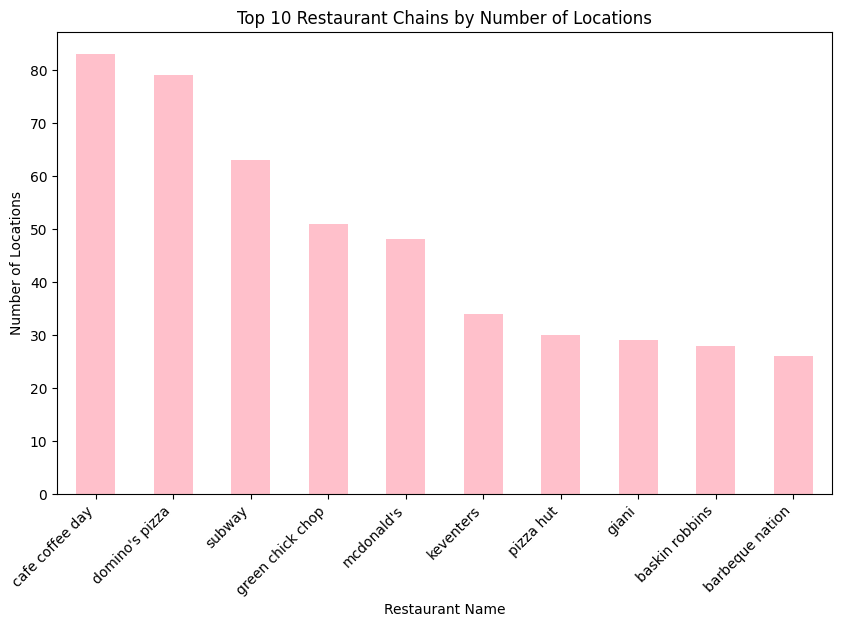

In [12]:

restaurant_chains.sort_values(ascending = False).head(10).plot(
    kind = 'bar', color = 'pink', figsize = (10, 6)
)
plt.title('Top 10 Restaurant Chains by Number of Locations')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Locations')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


2. Top chains by ratings:

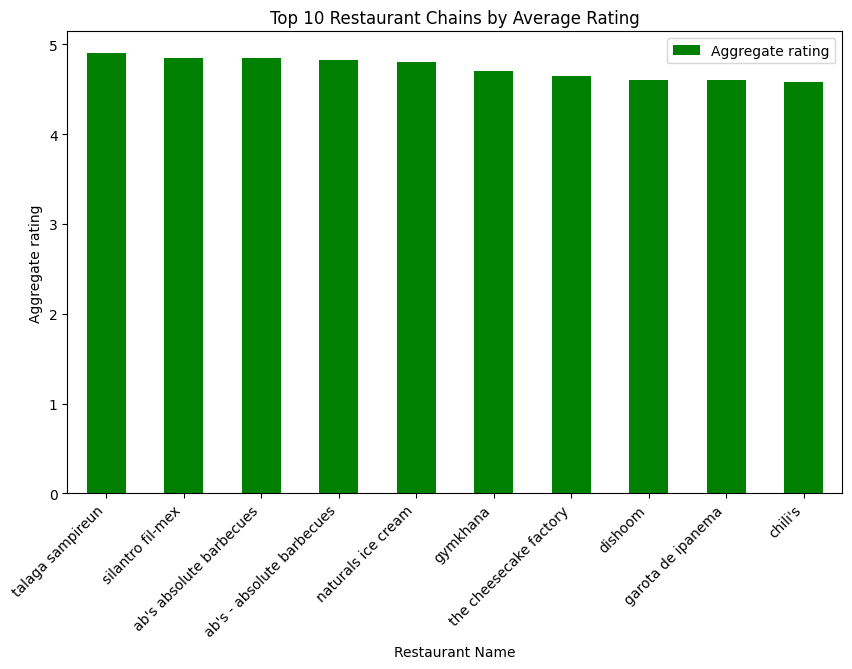

In [20]:

top_chains_by_rating.plot(
    kind = 'bar', x = 'Restaurant Name', y = 'Aggregate rating', color = 'green', figsize = (10,6)
)
plt.title('Top 10 Restaurant Chains by Average Rating')
plt.xlabel('Restaurant Name')
plt.ylabel('Aggregate rating')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


3. Top chains by votes:

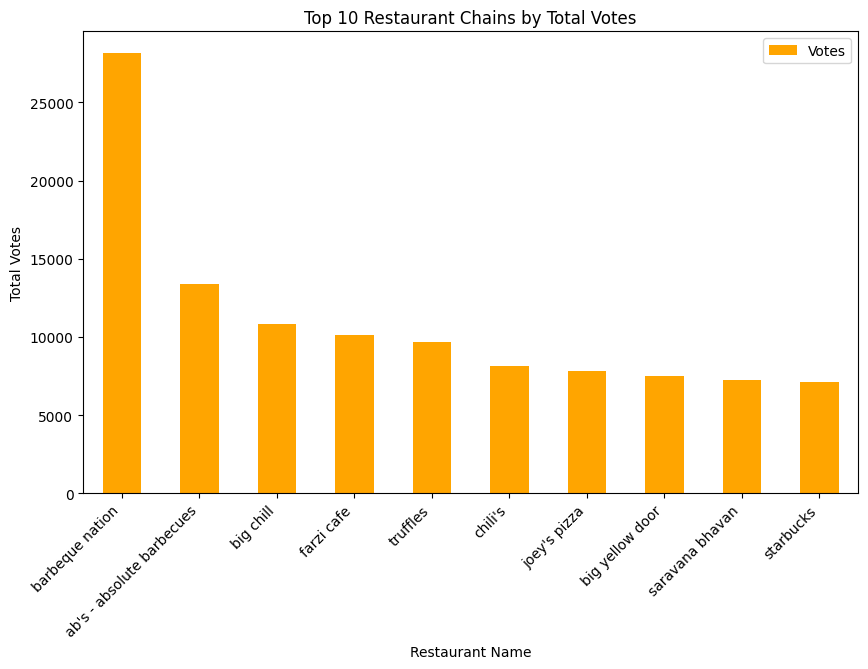

In [15]:

top_chains_by_votes.plot(
    kind = 'bar', x = 'Restaurant Name', y = 'Votes', color = 'orange', figsize = (10, 6)
)
plt.title('Top 10 Restaurant Chains by Total Votes')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Votes')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


### Step 5: Trend Analysis

1. Ratings Trends

In [16]:

avg_chain_rating = df[df['is_chain']]['Aggregate rating'].mean()
avg_non_chain_rating = df[~df['is_chain']]['Aggregate rating'].mean()
print(f"Average Rating for Chains : {avg_chain_rating : .2f}")
print(f"Average Rating for Non-Chains : {avg_non_chain_rating :.2f}")


Average Rating for Chains :  2.79
Average Rating for Non-Chains : 2.61


2. Votes Trends:

In [17]:

total_chain_votes = df[df['is_chain']]['Votes'].sum()
total_non_chain_votes = df[~df['is_chain']]['Votes'].sum()
print(f"Total Votes for Chains : {total_chain_votes}")
print(f"Total Votes for Non-Chains : {total_non_chain_votes}")


Total Votes for Chains : 513845
Total Votes for Non-Chains : 984800


### Step 6: The Insights